In [3]:
!pip install opendatasets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

In [5]:
od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vshravanth
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 403kB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [6]:
os.listdir('house-prices-advanced-regression-techniques')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
raw_df=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [8]:
raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
colm_drop=['Alley','PoolQC','Fence','MiscFeature','Id']
raw_df = raw_df.drop(colm_drop, axis=1)

<Axes: xlabel='SalePrice', ylabel='Count'>

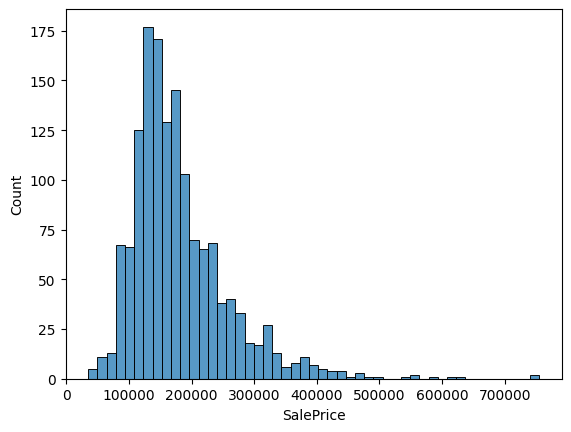

In [11]:
sns.histplot(raw_df['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

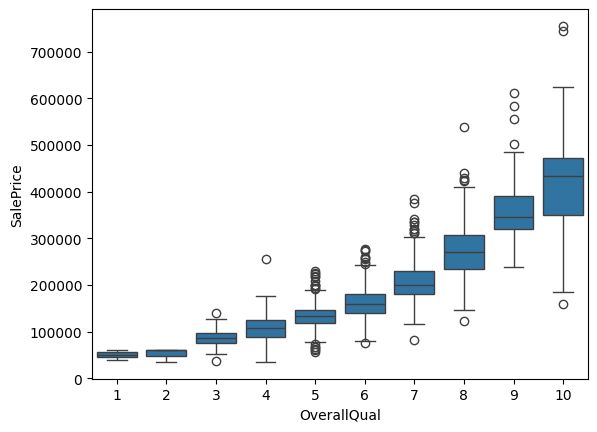

In [12]:
sns.boxplot(x='OverallQual', y='SalePrice', data=raw_df)

Text(0.5, 1.0, 'Violin Plot of Sale Price by Overall Quality')

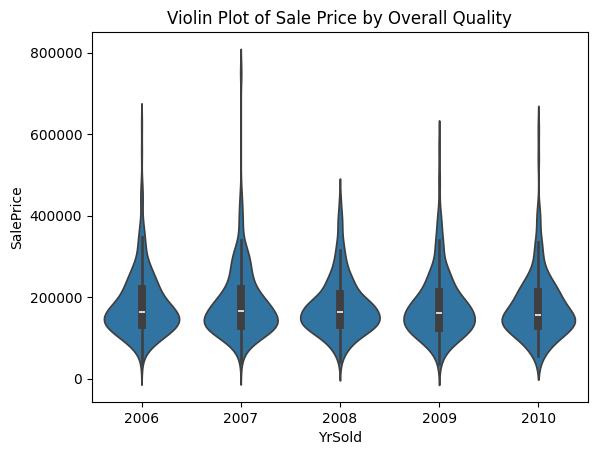

In [13]:
sns.violinplot(x='YrSold', y='SalePrice', data=raw_df)
plt.title('Violin Plot of Sale Price by Overall Quality')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [15]:
train_df, test_df = train_test_split(raw_df, test_size=0.3, random_state=42)

In [16]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
135,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,174000
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,145000
762,60,FV,72.0,8640,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,Con,Normal,215200
932,20,RL,84.0,11670,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2007,WD,Normal,320000
435,60,RL,43.0,10667,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2009,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Normal,176432
1130,50,RL,65.0,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2009,WD,Normal,135000
1294,20,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,115000
860,50,RL,55.0,7642,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,189950


In [17]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,154500
1105,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,325000
413,30,RM,56.0,8960,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,130,0,0,0,0,3,2010,WD,Normal,115000
522,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,10,2006,WD,Normal,159000
1036,20,RL,89.0,12898,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20,RL,70.0,8176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,139000
323,20,RM,49.0,5820,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,126175
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,205950
439,50,RL,67.0,12354,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,800,8,2009,ConLI,Normal,110000


In [18]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()

#Impute numerical columns:
imputer=SimpleImputer(strategy='mean')
train_df[numerical_cols]=imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols]=imputer.transform(test_df[numerical_cols])

#OneHotEncode:
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_encoded=encoder.fit_transform(train_df[categorical_cols])
test_encoded=encoder.transform(test_df[categorical_cols])
#Convert back to DataFrames
train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

train_df = pd.concat([train_df[numerical_cols].reset_index(drop=True), train_encoded.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df[numerical_cols].reset_index(drop=True), test_encoded.reset_index(drop=True)], axis=1)


In [19]:
x_train=train_df.drop('SalePrice', axis=1)
y_train=train_df['SalePrice']
x_test=test_df.drop('SalePrice', axis=1)
y_test=test_df['SalePrice']

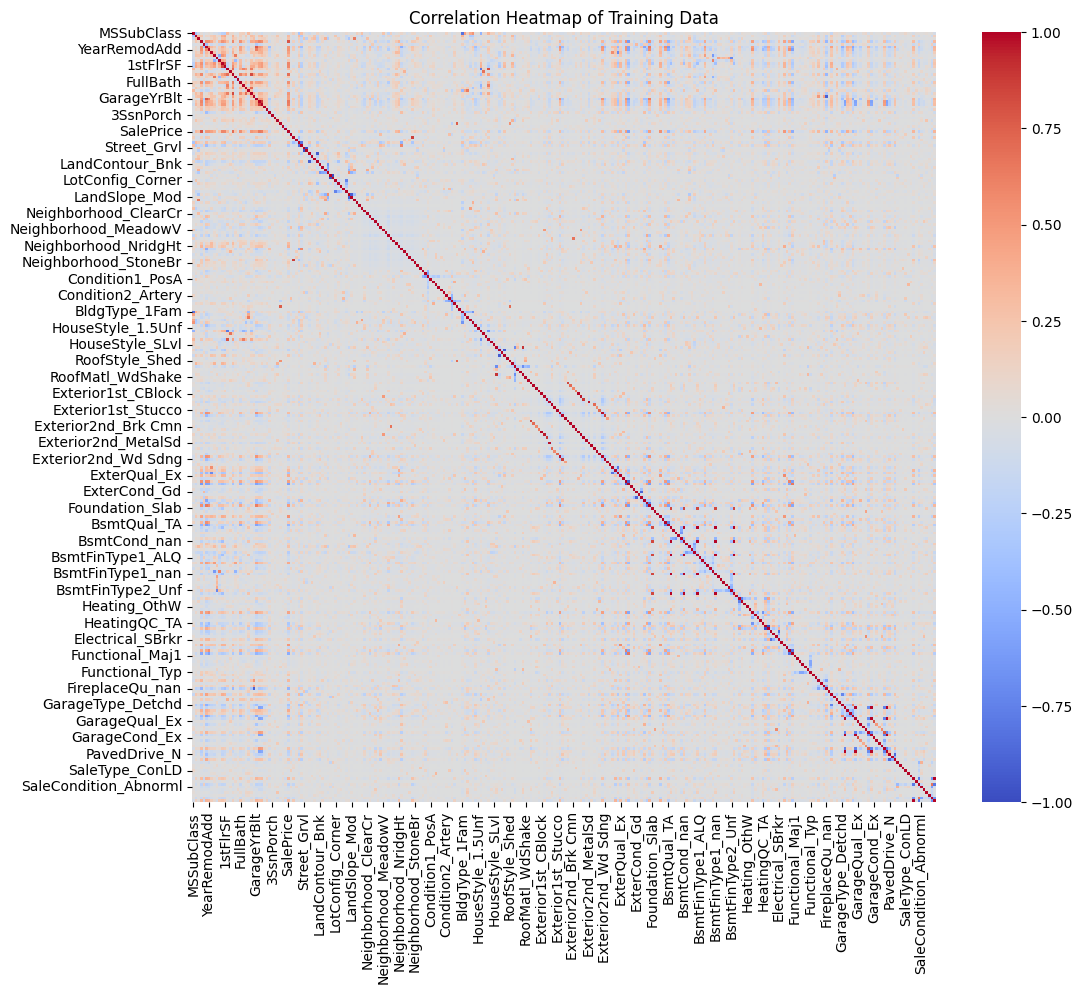

In [20]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Training Data')
plt.show()

The heat map is very heavy Lets try training the model and see how it works

Model:-

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge

In [49]:
#Linear Regression:
model=LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 18397.07939819805
R2 Score: 0.8872164633776278


In [79]:
#Lasso
model=Lasso(alpha=38)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 16771.602345626532
R2 Score: 0.9043880871561445


In [110]:
#Ridge
model=Ridge(alpha=62)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 18604.596255394023
R2 Score: 0.8718677198715098


In [125]:
#Decision Tree
model=DecisionTreeRegressor(max_depth=2000)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 25377.424657534248
R2 Score: 0.7856797685260664


In [153]:
#Random Classifier
model=RandomForestRegressor(n_estimators=300)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 16693.213569254185
R2 Score: 0.8962098097770841


In [158]:
#XGBoost
model = XGBRegressor(n_estimators=300, learning_rate=0.1, objective='reg:squarederror', random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 16206.50754494863
R2 Score: 0.90957234679931


Here XgBoost is giving a better result can be hypertuned but 90 percent is a good model which is taking everything into consideration